In [2]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

In [38]:
frequencies = [2]
ts_length = 50

TS = []
Time = np.linspace(0, len(frequencies)*ts_length, len(frequencies)*ts_length)
gaussian_noise = np.random.normal(0, 0.1, ts_length)

pi_to_pi = np.linspace(-np.pi, np.pi, 200)

X = np.arange(4*ts_length)

period = 0
for freq in frequencies:
    print("iterating ", freq)
    TS = np.sin(2*np.pi*freq*X/4)
    """
    TS = np.hstack((TS, 
                    np.cos(freq*np.linspace(period+0, period +ts_length, ts_length))
                      + np.sin(freq*np.linspace(period+0, period +ts_length, ts_length))
                    + gaussian_noise))
    """
    period = TS.shape[0]

iterating  2


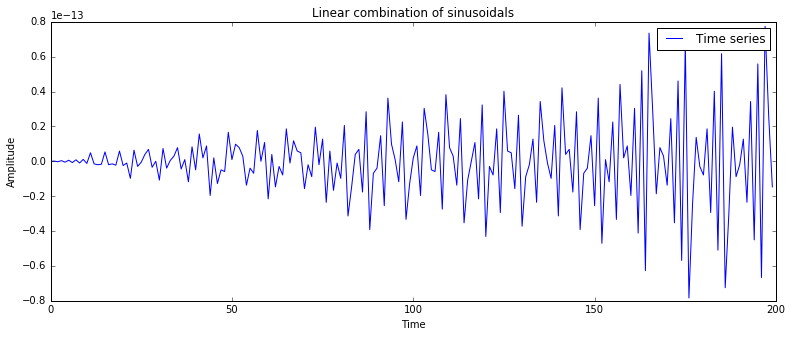

In [39]:
plt.figure(figsize=(13,5))
plt.plot(X, TS, label="Time series")
plt.title("Linear combination of sinusoidals")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.savefig('../reports/images/spectral_density_2/ts2.png')

In [32]:
plt.close()

In [6]:
def get_peridogram(X, llambda, time):
    return (1/X.shape[0]) * np.power(np.absolute(np.sum(X * np.power(np.e, (-1J*time*llambda)))), 2)

In [7]:
peridograms = []

for l in pi_to_pi:
    peridograms.append(get_peridogram(TS, l, Time))

<IPython.core.display.Javascript object>


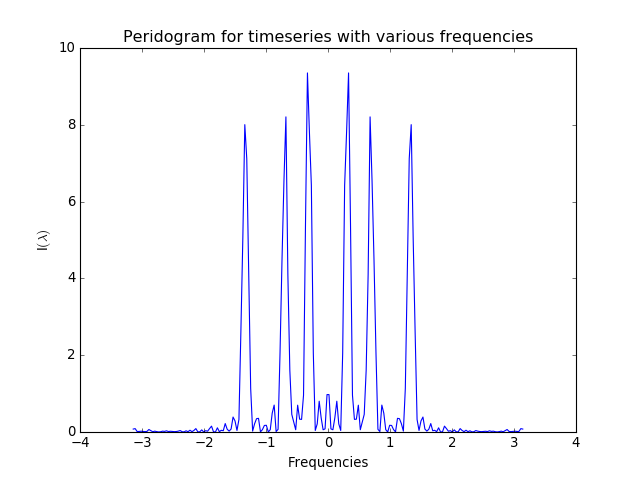

In [8]:
plt.title("Peridogram for timeseries with various frequencies")
plt.plot(pi_to_pi, peridograms)
plt.xlabel("Frequencies")
plt.ylabel("I$(\lambda)$")
plt.savefig('../reports/images/spectral_density_2/peri2.png')

In [34]:
plt.close()

<IPython.core.display.Javascript object>


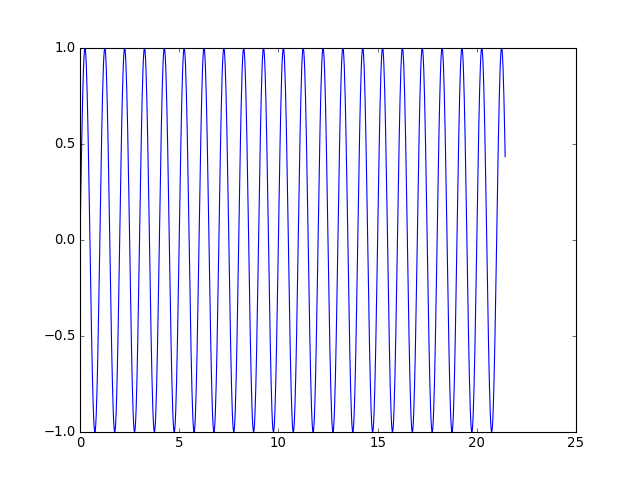

In [24]:
plt.close()
fs = 100 # sample rate 
f = 1 # the frequency of the signal

x = np.linspace(0,300, 1000) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
#y = [ np.sin(2*np.pi*f * (i/fs)) for i in np.arange(fs)]
y = np.sin(2*np.pi*f * x/14)

# showing the exact location of the smaples
#plt.stem(x,y, 'r', )
plt.plot(x/14,y)

In [10]:
y

array([  0.00000000e+00,  -4.89858720e-16,  -9.79717439e-16,
        -1.46957616e-15,  -1.95943488e-15,  -2.44929360e-15,
        -2.93915232e-15,  -3.42901104e-15,  -3.91886976e-15,
        -4.40872848e-15,  -4.89858720e-15,  -1.95993006e-14,
        -5.87830464e-15,   7.84269136e-15,  -6.85802208e-15])